In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos de generación y meteorológicos
plant_1_generation = pd.read_csv('Plant_1_Generation_Data.csv')
plant_1_weather = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

# Copiar los datos de generación para mantener df_GD1 limpio
df_GD1 = plant_1_generation.copy()

# Aplicar el mapeo a los nombres de los paneles solares
unique_source_keys_list = df_GD1['SOURCE_KEY'].unique()
source_key_mapping = {key: f"Solar_Panel_{i+1}" for i, key in enumerate(unique_source_keys_list)}
df_GD1['SOURCE_KEY'] = df_GD1['SOURCE_KEY'].map(source_key_mapping)

# Convertir la columna 'DATE_TIME' a formato de fecha y hora
df_GD1['DATE_TIME'] = pd.to_datetime(df_GD1['DATE_TIME'], format='%d-%m-%Y %H:%M')
plant_1_weather['DATE_TIME'] = pd.to_datetime(plant_1_weather['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# Unir los datos meteorológicos al dataframe de generación en función de la fecha y hora
df_GD1_with_weather = pd.merge(df_GD1, plant_1_weather, on='DATE_TIME', how='left')

# Mostrar las primeras filas para verificar la unión
df_GD1_with_weather.head()


,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,Solar_Panel_1,0.0,0.0,0.0,6259559.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,Solar_Panel_2,0.0,0.0,0.0,6183645.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001,Solar_Panel_3,0.0,0.0,0.0,6987759.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001,Solar_Panel_4,0.0,0.0,0.0,7602960.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,Solar_Panel_5,0.0,0.0,0.0,7158964.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


In [7]:
# Eliminar las columnas PLANT_ID_y y SOURCE_KEY_y y renombrar las columnas PLANT_ID_x y SOURCE_KEY_x
df_GD1_with_weather_clean = df_GD1_with_weather.drop(columns=['PLANT_ID_y', 'SOURCE_KEY_y','PLANT_ID_x'])

# Renombrar las columnas para eliminar el sufijo '_x'
df_GD1_with_weather_clean = df_GD1_with_weather_clean.rename(columns={'SOURCE_KEY_x': 'SOURCE_KEY'})

df_GD1_with_weather_clean.head()


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,Solar_Panel_1,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0
1,2020-05-15,Solar_Panel_2,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0
2,2020-05-15,Solar_Panel_3,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0
3,2020-05-15,Solar_Panel_4,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0
4,2020-05-15,Solar_Panel_5,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0


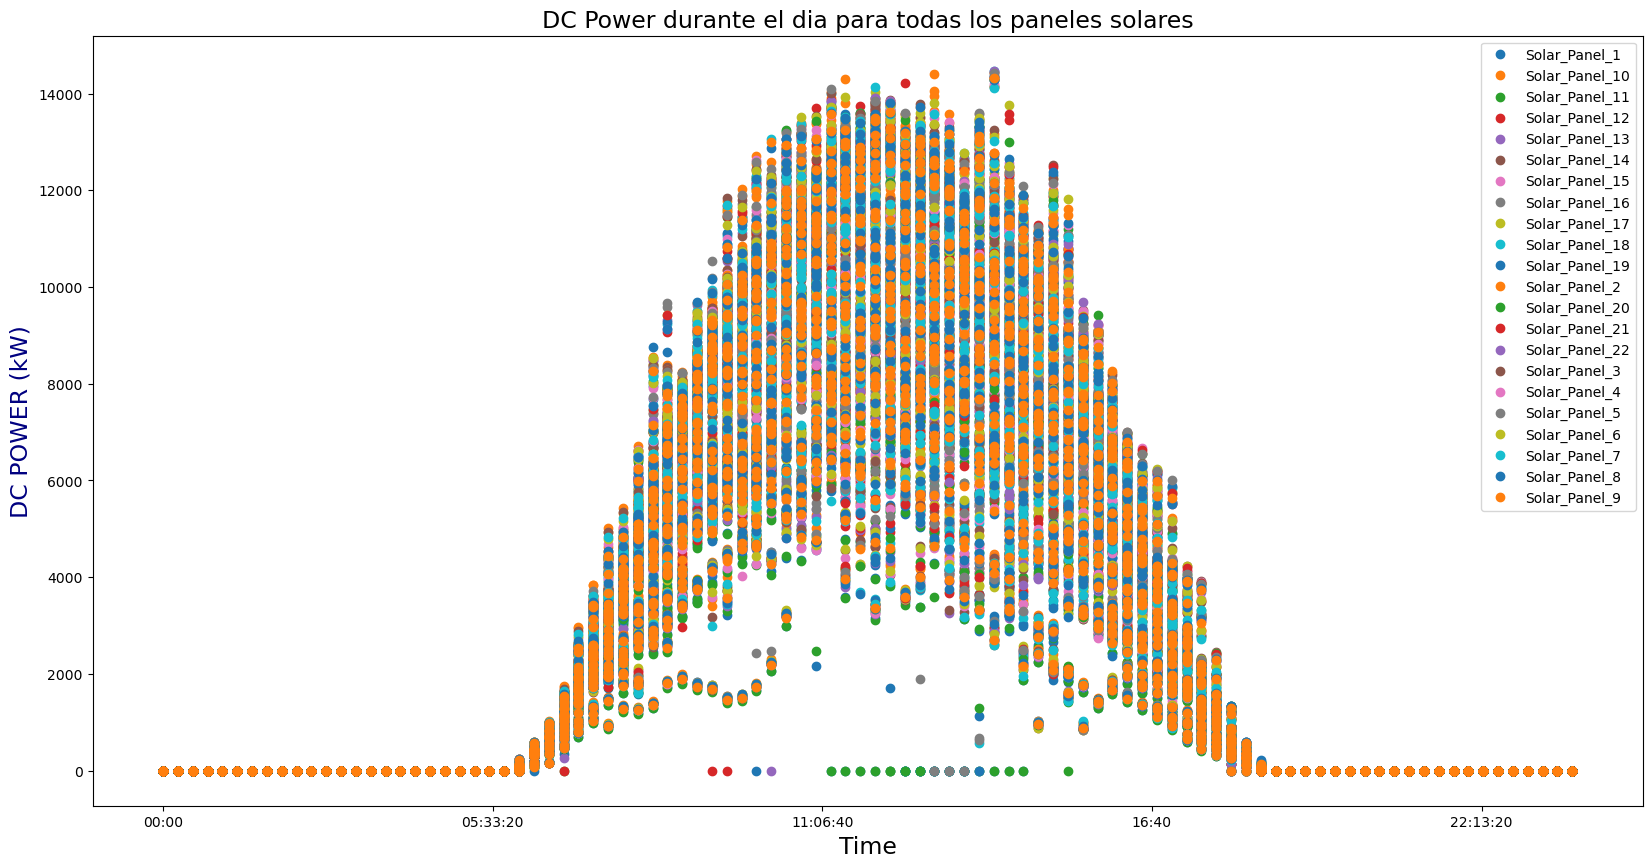

In [8]:
sources = df_GD1_with_weather_clean.copy()

# Asegurarse de que la columna 'DATE_TIME' esté en formato datetime
sources['DATE_TIME'] = pd.to_datetime(sources['DATE_TIME'])

# Extraer la hora de la columna 'DATE_TIME'
sources['time'] = sources['DATE_TIME'].dt.time

# Crear un gráfico del 'DC_POWER' durante el día para cada 'SOURCE_KEY'
sources.set_index('time').groupby('SOURCE_KEY')['DC_POWER'].plot(style='o', legend=True, figsize=(20,10))

# Títulos y etiquetas
plt.title('DC Power durante el dia para todas los paneles solares', size=17)
plt.ylabel('DC POWER (kW)', color='navy', fontsize=17)
plt.xlabel('Time', fontsize=17)

# Mostrar el gráfico
plt.show()


In [12]:
# Verificar si hay valores nulos
nulos = df_GD1_with_weather_clean.isnull().sum()

# Mostrar cuántos valores nulos hay por columna
print(nulos)

# Rellenar los valores nulos en solo las columnas numéricas con la media
numerical_cols = df_GD1_with_weather_clean.select_dtypes(include=['float64', 'int64']).columns #Estp para quitar los floats
df_GD1_with_weather_clean[numerical_cols] = df_GD1_with_weather_clean[numerical_cols].fillna(df_GD1_with_weather_clean[numerical_cols].mean())

# Mostrar las primeras filas después de limpiar los nulos
df_GD1_with_weather_clean.head()


DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,Solar_Panel_1,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0
1,2020-05-15,Solar_Panel_2,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0
2,2020-05-15,Solar_Panel_3,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0
3,2020-05-15,Solar_Panel_4,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0
4,2020-05-15,Solar_Panel_5,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0
